# Анализ данных о продажах компьютерных игр

- **Данные:** из открытых источников доступны исторические данные о продажах компьтерных игр за 1980-2016гг с оценками пользователей и экспертов, с указанием жанров и платформ.
- **Задача:** выявить определяющие успешность игры закономерности.
- **Цель:** на основе выявленных закономерностей сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

**Описание данных**
-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Откроем и изучим общую информацию файла с данными

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(10) # посмотрим на первые 10 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info() # посмотрим на общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe() # выведем для просмотра описательной статистики 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
data.columns = data.columns.str.lower() # приведем названия колонок к нижнему регистру

array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>],
       [<AxesSubplot:title={'center':'eu_sales'}>,
        <AxesSubplot:title={'center':'jp_sales'}>],
       [<AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>]], dtype=object)

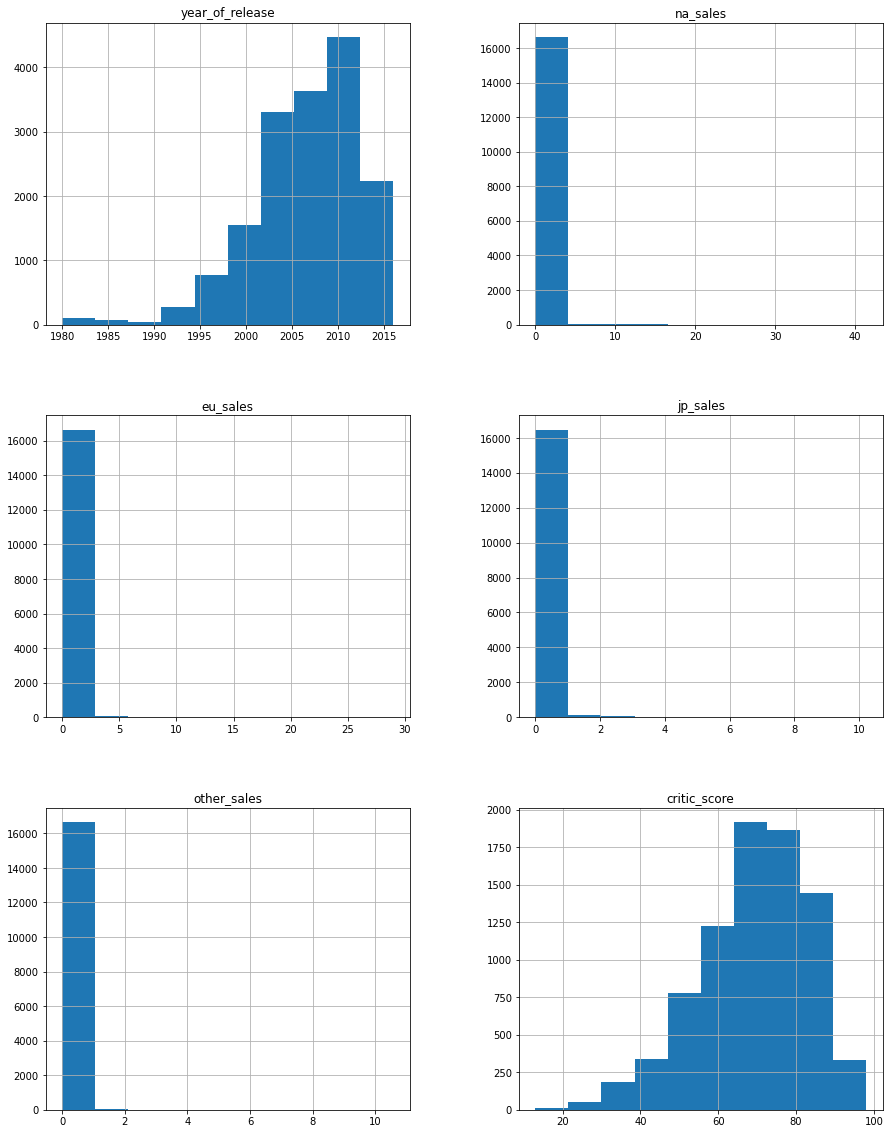

In [7]:
data.hist(figsize=(15, 20)) # построим гистограммы всех числовых столбцов

## Подготовка данных

In [8]:
data.isna().sum() # посмотрим на пропуски и их количество

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Посмотрим на пропуски в столбце "name" - название игры

In [9]:
data.loc[data['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# в этих же строках 2 пропуска в колонке 'genre'
data.dropna(subset=['name'], inplace=True) # удалим строки без названия игр и жанра игры

### Посмотрим на пропуски в столбце "year_of_release" - год релиза

In [11]:
data.loc[(data['year_of_release'].isnull() == True) & ((data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales'])\
>= 2)].sort_values(by='na_sales', ascending=False)
# посмотрим на строки, в которых отсутсвует год релиза при сумме значений проданных копий по всем странам больше 2млн.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E


In [12]:
data.loc[data['name'] == 'Madden NFL 2004'] # посмотрим представлена ли самая популярная игра ещё на других платформах

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [13]:
data.loc[data['name'] == 'Space Invaders'] # посмотрим представлена ли популярная игра ещё другими годами

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


**Прежде, чем удалять пропуски, что бы не исказить анализ, мы можем заменить пропуски в играх с самым большим числом проданных копий на, скажем, значение года по такие же играм, если год релиза заполнен. При этом, как мы выявили, невсегда год релиза совпадает на разных платформах, поэтому можно заменить на медианное значение.**

In [14]:
for d in data['name'].unique():  # по названию игры
 # заменим все пустые ячейки в столбце с годом релиза на медианное значение
    try:
        if data.loc[data['name']==d, 'year_of_release'].sum() > 0:
            data.loc[(data['name']==d) & (data['year_of_release'].isna()), 'year_of_release'] = data.loc[data['name'] == d, 'year_of_release'].median()
    except:
        print('ошибка')


In [15]:
data.loc[(data['year_of_release'].isnull() == True) & ((data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales'])\
>= 0.5)].sort_values(by='na_sales', ascending=False)
# посмотрим на строки, в которых отсутсвует год релиза при сумме значений проданных копий по всем странам больше суммы всех средних, равной примерно 0,5млн копий

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
2106,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.00,0.01,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.00,0.35,82.0,6.8,T


Заполним год релиза в строках, где есть оценки. Данные возьмем с общедоступных сайтов в интернете.

In [16]:
data.loc[(data['year_of_release'].isna()) & (data['name'] == "Frogger's Adventures: Temple of the Frog"), 'year_of_release'] = 2001

In [17]:
data.loc[(data['year_of_release'].isna()) & (data['name'] == 'Rock Band'), 'year_of_release'] = 2007

In [18]:
data.loc[(data['year_of_release'].isna()) & (data['name'] == 'Legacy of Kain: Soul Reaver'), 'year_of_release'] = 1999

In [19]:
data.loc[(data['year_of_release'].isna()) & (data['name'] == 'Advance Wars: Days of Ruin'), 'year_of_release'] = 2008

In [20]:
data.loc[(data['year_of_release'].isna()) & (data['name'] == 'Test Drive Unlimited 2'), 'year_of_release'] = 2011

In [21]:
data.loc[(data['year_of_release'].isna()) & (data['name'] == 'Suikoden III'), 'year_of_release'] = 2002

In [22]:
data.loc[(data['year_of_release'].isna()) & (data['name'] == 'Yakuza 4'), 'year_of_release'] = 2010

In [23]:
data.loc[(data['year_of_release'].isnull() == True) & ((data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']) >= 0.5)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
2010,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN
2106,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.00,0.01,NaN,NaN,NaN
2773,WarioWare: Twisted!,GBA,NaN,Puzzle,0.16,0.06,0.50,0.02,NaN,NaN,NaN
3187,Monster Hunter 2,PS2,NaN,Role-Playing,0.00,0.00,0.63,0.00,NaN,NaN,NaN
3883,Fishing Derby,2600,NaN,Sports,0.48,0.03,0.00,0.01,NaN,NaN,NaN


In [24]:
data.isna().sum()

name                  0
platform              0
year_of_release     134
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [25]:
data.dropna(subset=['year_of_release'], inplace=True) # удалим оставшиеся 134 строки без значения года релиза, 
# их доля незначительна в количестве из 16715, в 9 строках при значительных количествах проданных копий нет оценок для анализа, 
# в остальных 125 строках количествах проданных копий по всем странам ниже среднего по всем странам

In [26]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [27]:
# проверим, есть ли строки с отсутствующей суммой значений проданных копий по всем странам
data.loc[(data['year_of_release'].isnull() == True) & ((data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']) == 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Посмотрим на пропуски в столбце "critic_score" - оценка критиков (максимум 100)

In [28]:
data[data['critic_score'].isnull()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12159,TigerShark,PS,1997,Simulation,0.04,0.03,0.00,0.00,NaN,NaN,NaN
8600,Just Dance: Disney Party,X360,2012,Misc,0.13,0.02,0.00,0.02,NaN,tbd,E
12824,Nobunaga no Yabou: Souzou,PS4,2014,Strategy,0.00,0.00,0.06,0.00,NaN,NaN,NaN
14265,Dream C Club Zero,X360,2011,Simulation,0.00,0.00,0.03,0.00,NaN,NaN,NaN
15823,Dynasty Warriors: Eiketsuden,PS4,2016,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
7801,Marvel Super Hero Squad: Comic Combat,PS3,2011,Action,0.11,0.05,0.00,0.03,NaN,tbd,E10+
4791,Samurai Shodown,SNES,1994,Fighting,0.00,0.00,0.40,0.00,NaN,NaN,NaN
16229,Dr. Slump & Arale-Chan,DS,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
8667,Street Racer,PS,1996,Racing,0.09,0.06,0.00,0.01,NaN,NaN,NaN
5553,One Piece: Romance Dawn - Bouken no Yoake,PSP,2012,Fighting,0.00,0.00,0.32,0.00,NaN,NaN,NaN


In [29]:
data.loc[data['critic_score'].isnull() == True, 'platform'].unique() # посмотрим на каких платформах нет оценок критиков

array(['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360',
       'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP',
       'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**Пропусков слишком много в общем количестве строк и они в строках многих платформ, разных лет выпуска, удалять их нельзя.**

### Посмотрим на пропуски в столбце "user_score" - оценка пользователей (максимум 10)

In [30]:
data[data['user_score'].isnull()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4348,NHL FaceOff,PS,1994,Sports,0.25,0.17,0.00,0.03,NaN,NaN,NaN
10938,Hakuouki: Zuisouroku Portable,PSP,2010,Adventure,0.00,0.00,0.09,0.00,NaN,NaN,NaN
12643,Raw Danger! (JP sales),PS2,2006,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN
5279,Mega Man X3,SNES,1995,Action,0.04,0.01,0.30,0.00,NaN,NaN,NaN
1207,Command & Conquer: Tiberian Sun,PC,1999,Strategy,1.55,0.00,0.00,0.00,NaN,NaN,NaN
2706,Legends of Wrestling,PS2,2001,Fighting,0.37,0.29,0.00,0.10,NaN,NaN,NaN
14646,Mahjong Kakutou Club: Zenkoku Taisenban,PS3,2006,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
3501,Beyond The Beyond,PS,1995,Role-Playing,0.11,0.08,0.35,0.04,NaN,NaN,NaN
14189,Yggdra Union: We'll Never Fight Alone,GBA,2006,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
9609,Fuse (Insomniac),X360,2013,Shooter,0.09,0.03,0.00,0.01,NaN,NaN,NaN


In [31]:
data.loc[data['user_score'].isnull() == True, 'platform'].unique() # посмотрим на каких платформах нет оценок пользователей

array(['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360',
       'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP',
       'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [32]:
data.loc[data['user_score'].isnull() == True, 'rating'].unique() # посмотрим на варианты рейтинга в этих строках

array([nan, 'T', 'E', 'M', 'E10+', 'RP'], dtype=object)

**Пропусков слишком много в общем количестве строк, они в строках многих платформ, рейтинг в них не только NaN, удалять их нельзя.**

In [33]:
data['user_score'].unique() # посмотрим на уникальные значения в ценках пользователей

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [34]:
data.query('user_score == "tbd"')  # посмотрим на строки со значением 'tbd'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2001,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено), т.е. это равнозначно отсутствию значения. Тогда сотрем это значение.

In [35]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [36]:
data['user_score'] = data['user_score'].astype(float) # преобразуем данные в вещественные числа

### Посмотрим на пропуски в столбце "rating" - рейтинг от организации ESRB

In [37]:
data[data['rating'].isnull()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13495,Sotsugyou II: Neo Generation,PS,1995,Simulation,0.00,0.00,0.04,0.00,NaN,NaN,NaN
783,PES 2009: Pro Evolution Soccer,PS3,2008,Sports,0.11,1.33,0.40,0.26,NaN,NaN,NaN
2891,Jeopardy!,PS,1997,Misc,0.39,0.27,0.00,0.05,NaN,NaN,NaN
5620,Rally Cross,PS,1997,Racing,0.18,0.12,0.00,0.02,NaN,NaN,NaN
15847,Memories Off: Yubikiri no Kikou,PSP,2011,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15038,Ano Hi Mita Hana no Namae o Bokutachi wa Mada ...,PSP,2012,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10169,Maximum Force,PS,1997,Shooter,0.06,0.04,0.00,0.01,NaN,NaN,NaN
13954,Tokumei Sentai Go-Busters,DS,2012,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
6831,Paws & Claws: Pet Resort,DS,2008,Simulation,0.22,0.00,0.00,0.02,NaN,NaN,NaN
10350,Saigo no Yakusoku no Monogatari,PSP,2011,Role-Playing,0.00,0.00,0.11,0.00,NaN,NaN,NaN


In [38]:
data.loc[data['rating'].isnull() == True, 'platform'].unique() # посмотрим на каких платформах нет рейтингов

array(['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360',
       'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP',
       'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [39]:
data.loc[data['rating'].isnull() == True, 'user_score'].unique() # посмотрим есть ли оценки пользователей в этих строках

array([nan, 8.3, 9.2, 6.7, 6. , 6.4, 6.1, 7.6, 8. , 8.2, 8.6, 8.4, 7.9,
       7.3, 4.4, 8.7, 6.8, 4.5, 4.1, 5. , 4.3, 7.5, 8.1, 6.9, 8.8, 7.2,
       4.9, 7.7, 7.4, 5.8, 7.8, 4.8, 7. , 4. , 5.2, 6.2, 6.5, 8.5, 4.7,
       3.2, 3.1, 7.1])

**Пропусков слишком много в общем количестве строк, они в строках многих платформ, 10-бальные оценки в них не только NaN, удалять их нельзя.**

In [40]:
data['rating'].value_counts() # посмотрим на уникальные значения рейтинга (согласно Википеди всего сейчас их 7)

E       3959
T       2939
M       1555
E10+    1413
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

Список существующих оценок:
Все возраста (E)
Подросток (Т)
Зрелые 17+ (М)
Старше 10+ (E10+)
Раннее детство (ЕС)
Ожидаемый рейтинг (RP)
Только для взрослых 18+ (АО)

Рейтинг K-A для детей и взрослых: игры, содержащие контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E.

In [41]:
data.loc[data['rating'] == 'K-A','rating'] = 'E' # исправим устаревшие данные К-А на рейтинг Е

In [42]:
data['rating'] = data['rating'].fillna('unknown') # заменим пропуски в рейтинге на unknown

In [43]:
# создадим столбец с суммарными продажами во всех регионах 
data['generalis_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [44]:
data.reset_index(drop=True).head(10) # после удаления строк обновим индексацию

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,generalis_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


***ВЫВОД: Причиной пропусков в оценках пользователей, вероятно, является просто нежелание ставить оценки. Рейтинг от организации ESRBО стал присваиваться только с 1994 года - даты основания компании, поэтому игры, выпущенные в 1980-1993гг., будут без рейтинга. Оценки критиков и присваивание рейтингов в последующие периоды, видимо, удостоились не все игры, что ожидаемо.***

## Исследовательский анализ данных

### Посмотрим на жизненный цикл платформ.

**Посмотрим, сколько игр выпускалось в разные годы.**

<AxesSubplot:title={'center':'Зависимость количества игр от года релиза'}, xlabel='year_of_release'>

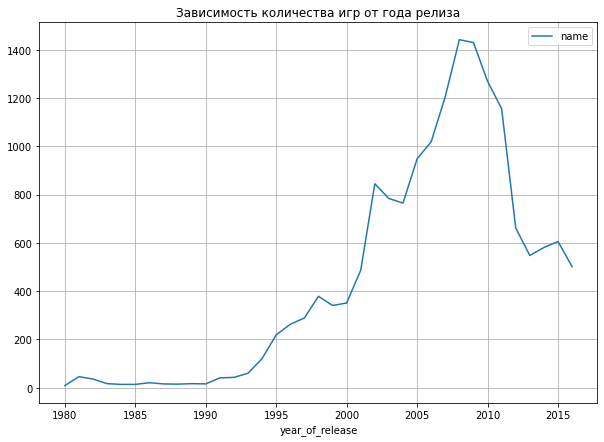

In [45]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.plot(grid=True, title='Зависимость количества игр от года релиза', figsize=(10, 7))
#  в 80-е и 90-е годы игр совсем было мало, с каждым годом до 2008г. растет количество выпускаемых игр, затем резкий спад,
# но в 2013г. опять рост до 2015г., а в 2016г., как мы знаем, данные могут быть не полными.

**Посмотрим, как менялись продажи по платформам.**

<AxesSubplot:title={'center':'Продажи игр в разрезе платформ'}, xlabel='platform'>

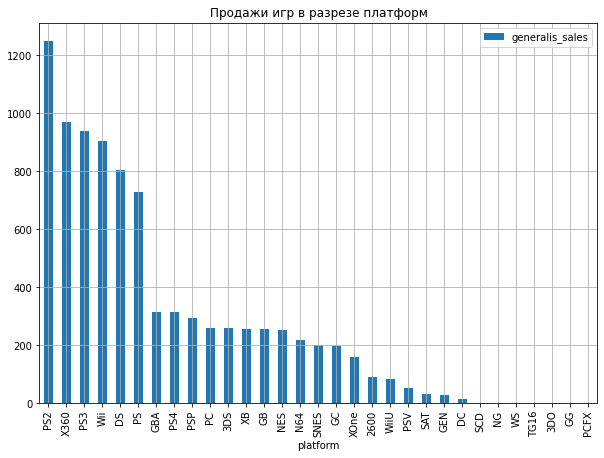

In [46]:
data.pivot_table(index='platform', values='generalis_sales', aggfunc='sum')\
.sort_values(by='generalis_sales', ascending=False)\
.plot(kind='bar', title='Продажи игр в разрезе платформ', figsize=(10, 7), grid=True)

<AxesSubplot:xlabel='year_of_release', ylabel='generalis_sales'>

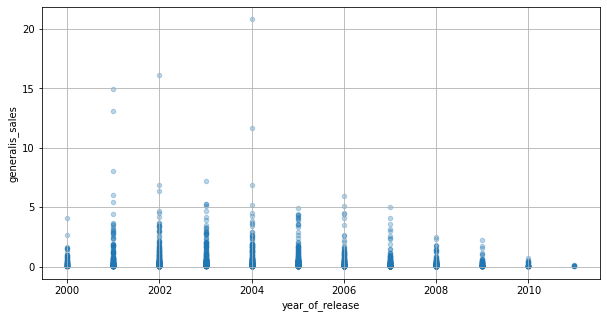

In [47]:
data[data['platform'] == 'PS2']\
.plot(x='year_of_release', y='generalis_sales', kind='scatter', alpha=0.3, figsize=(10,5), grid=True)

Платформа PS2 устарела, последние продажи в 2011г, насмену ей пришла PS3, данные для прогноза на 2017 год неактуальны

<AxesSubplot:xlabel='year_of_release', ylabel='generalis_sales'>

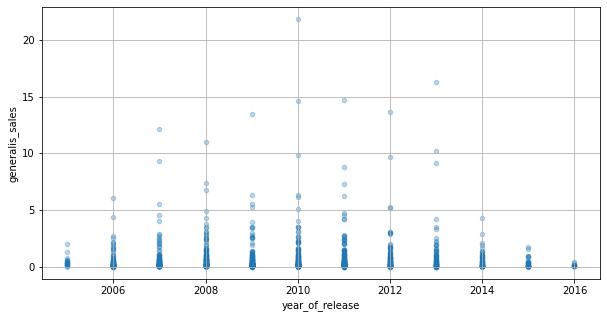

In [48]:
data[data['platform'] == 'X360']\
.plot(x='year_of_release', y='generalis_sales', kind='scatter', alpha=0.3, figsize=(10,5), grid=True)

Платформа X360 начала функционировать с 2005 года, в 2016 еще актуальна

<AxesSubplot:xlabel='year_of_release', ylabel='generalis_sales'>

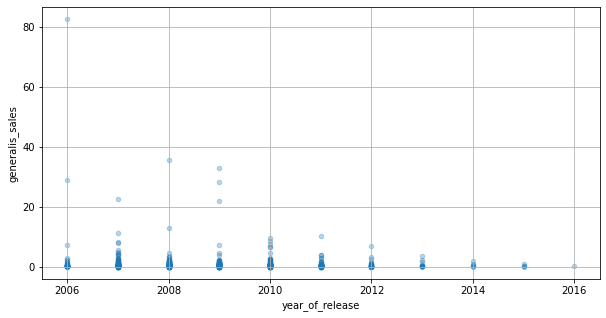

In [49]:
data[data['platform'] == 'Wii']\
.plot(x='year_of_release', y='generalis_sales', kind='scatter', alpha=0.3, figsize=(10,5), grid=True)

Платформа Wii начала функционировать с 2006 года, в 2016 еще актуальна, но уже совсем низкие продажи

<AxesSubplot:xlabel='year_of_release', ylabel='generalis_sales'>

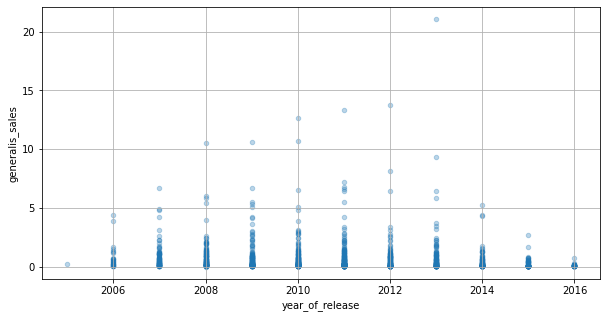

In [50]:
data[data['platform'] == 'PS3']\
.plot(x='year_of_release', y='generalis_sales', kind='scatter', alpha=0.3, figsize=(10,5), grid=True)

Платформа PS3 начала функционировать с 2005 года, в 2016 еще актуальна

<AxesSubplot:xlabel='year_of_release', ylabel='generalis_sales'>

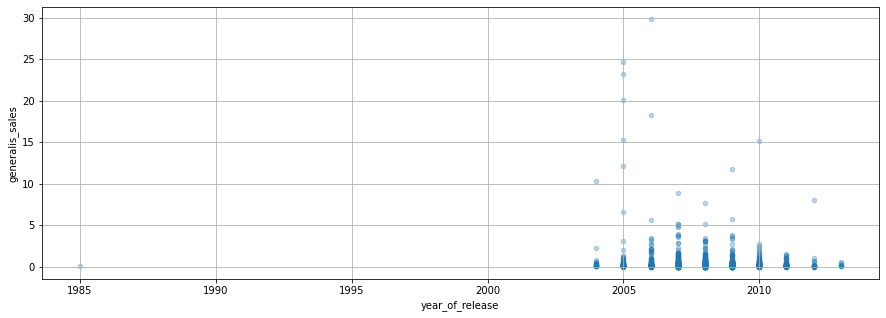

In [51]:
data[data['platform'] == 'DS']\
.plot(x='year_of_release', y='generalis_sales', kind='scatter', alpha=0.3, figsize=(15,5), grid=True)

Платформа DS впервые выпустила игру в 1985 году, затем до 2004 года затишье, последние продажи в 2013г, данные для прогноза на 2017 год неактуальны

<AxesSubplot:xlabel='year_of_release', ylabel='generalis_sales'>

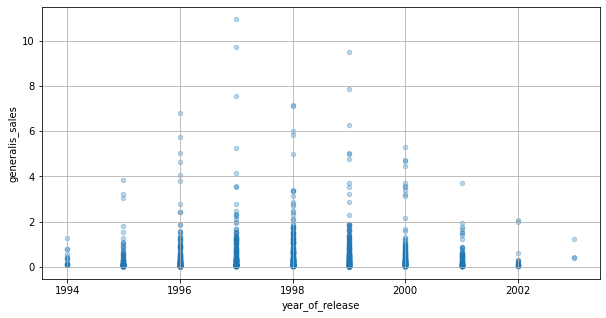

In [52]:
data[data['platform'] == 'PS']\
.plot(x='year_of_release', y='generalis_sales', kind='scatter', alpha=0.3, figsize=(10,5), grid=True)

Платформа PS устарела, последние продажи в 2003г, насмену ей пришли PS2, затем PS3, данные для прогноза на 2017 год неактуальны

**В среднем платформа существует 10-11лет, самая высокая популярность приходится на середину срока существования платформы.**

**С 2008г. по 2012г. количество выпускаемых игр падает, с 2013г. наоборот растет, да и устаревшие сведения не годятся для прогноза на будущее, поэтому используем только данные после 2012г.
Такая выборка даст более актуальный прогноз на 2017 год.**

In [53]:
data_13_16 = data.query('year_of_release >= 2013') # возьмем данные за 2013-2016гг

In [54]:
data_13_16['platform'].value_counts() # посмотрим какие платформы вошли в этот преиод и какие лидируют по количеству игр

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      192
X360    186
WiiU    115
PSP      68
Wii      23
DS        8
Name: platform, dtype: int64

In [55]:
data_13_16.loc[data_13_16['year_of_release'] == 2016, 'platform']\
.value_counts() # посмотрим какие платформы ещё продаются в 2016г

PS4     164
XOne     87
PSV      85
PC       54
3DS      46
PS3      38
WiiU     14
X360     13
Wii       1
Name: platform, dtype: int64

In [56]:
data_13_16 = data_13_16.query('platform not in ["PSP", "DS"]') # уберем из данных платформы, которые уже неактуальны в 2016г.

### Выясним, какие платформы лидируют по продажам и количеству игр

**Посмотрим по годам какие платформы лидируют по продажам, растут или падают (не забывая, что за 2016г. данные неполные)**

In [57]:
data_13_16.pivot_table(index='year_of_release', columns='platform', values='generalis_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2013,56.57,13.01,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


Явный рост по продажам показывают только PS4 и XOne.

**Посмотрим по годам какие платформы лидируют по количеству игр, растут или падают (не забывая, что за 2016г. данные неполные)**

In [58]:
data_13_16.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2013,91,41,126,16,63,12,42,75,19
2014,80,47,108,75,100,6,31,63,61
2015,86,50,73,137,110,4,28,35,80
2016,46,54,38,164,85,1,14,13,87


Растущими платформами можно назвать: PC, PS4 и XOne. Платформа PSV, если посмотреть выше, явно по сумме продаж в разрезе лет утратила популярнось с 2015 года, но количество игр в сравнении со многими ещё значительное. Платформа 3DS, возможно, находится на пике популярности.

**Оставим для анализа только перспективные платформы**

In [59]:
# уберем из данных платформы, которые уже на стадии спада
data_13_16 = data_13_16.query('platform not in ["PS3", "Wii", "WiiU", "X360"]') 

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

**Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам, определим разницу между данными**

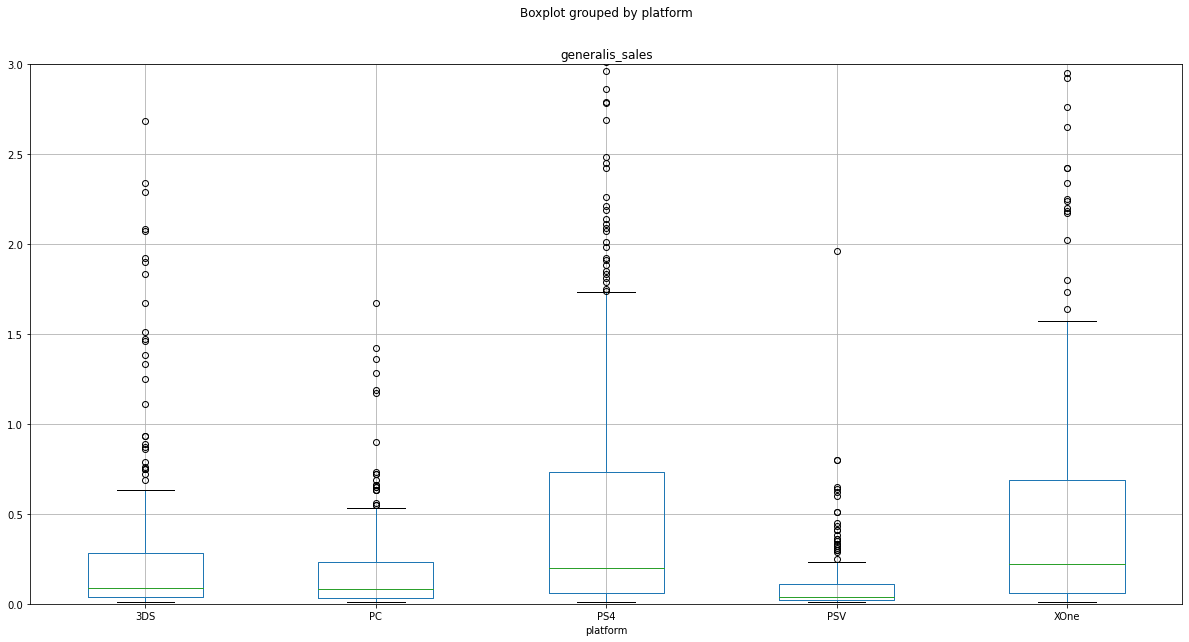

In [61]:
data_13_16.boxplot(column='generalis_sales', by='platform', grid= True, figsize=(20, 10))
plt.ylim(0, 3)
plt.show()

In [62]:
data_13_16.pivot_table(index='platform', values='generalis_sales', aggfunc=['count', 'sum', 'median', 'mean', 'var'])

,count,sum,median,mean,var
,generalis_sales,generalis_sales,generalis_sales,generalis_sales,generalis_sales
platform,,,,,
3DS,303,143.25,0.09,0.472772,1.908119
PC,192,40.06,0.08,0.208646,0.122360
PS4,392,314.14,0.20,0.801378,2.590350
PSV,358,32.99,0.04,0.092151,0.023660
XOne,247,159.32,0.22,0.645020,1.073584


**Как мы и установили ранее, лидером продаж является PS4, большой межквартильный размах показывает, что у этой платформы много разнообразных игр в немалом количестве проданных копий, как и у XOne. При этом у 3DS больше выпущенных игр в сравнении с XOne, но большинство игр у 3DS одинаково по популярности, и меньше копий продаж на каждую игру в сравнении с XOne. Выбросы на графике - это игры, которые чаще всего покупают, самых популярных игр также больше у PS4, XOne и 3DS. У платформы PSV самое маленькое значение медианы и среднего - эта самая непопулярная платформа, хотя по количеству проданных копий занимает вторую позицию**

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

**Посмотрим на самые популярные платформы PS4, XOne и 3DS**

#### Построим диаграмму рассеяния для платформы PS4 и посчитаем корреляцию между *оценками критиков* и продажами. 

<AxesSubplot:title={'center':'Зависимость между оценками критков и продажами для PS4'}, xlabel='critic_score', ylabel='generalis_sales'>

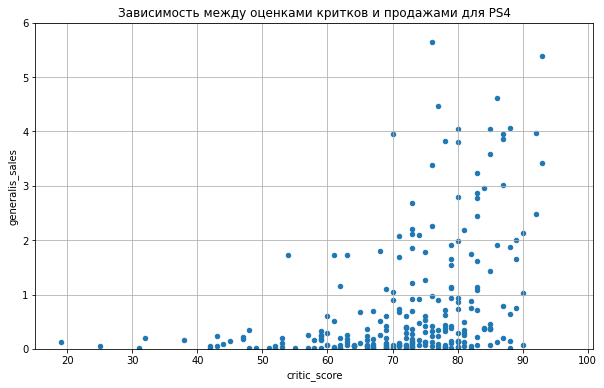

In [63]:
data_13_16[data_13_16['platform'] == 'PS4']\
.plot(x='critic_score', y='generalis_sales', ylim=(0, 6), title='Зависимость между оценками критков и продажами для PS4',\
      kind='scatter', figsize=(10,6), grid=True)

In [64]:
data_13_16[data_13_16['platform'] == 'PS4']['critic_score'].corr(data_13_16[data_13_16['platform'] == 'PS4']['generalis_sales'])

0.40656790206178095

Теперь построим диаграмму рассеяния и посчитаем корреляцию между **оценками пользователей** и продажами для PS4.

<AxesSubplot:title={'center':'Зависимость между оценками пользователей и продажами для PS4'}, xlabel='user_score', ylabel='generalis_sales'>

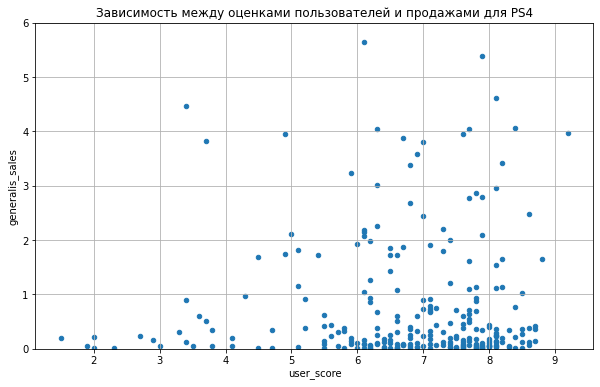

In [65]:
data_13_16[data_13_16['platform'] == 'PS4']\
.plot(x='user_score', y='generalis_sales', ylim=(0, 6), title='Зависимость между оценками пользователей и продажами для PS4',\
      kind='scatter', figsize=(10,6), grid=True)

In [66]:
data_13_16[data_13_16['platform']=='PS4']['user_score'].corr(data_13_16[data_13_16['platform'] == 'PS4']['generalis_sales'])

-0.031957110204556376

**Положительное значение коэффициент корреляции означает, что обе переменные движутся в одном направлении, тогда как отрицательное значение говорит нам, что они движутся в противоположных направлениях. Зависимость продаж от оценки критиков согласно графика и коэффициента корреляции умеренная, а зависимость от оценки пользователей совсем низкая.**

#### Построим диаграмму рассеяния для платформы XOne и посчитаем корреляцию между *оценками критиков* и продажами. 

<AxesSubplot:title={'center':'Зависимость между оценками критиков и продажами для XOne'}, xlabel='critic_score', ylabel='generalis_sales'>

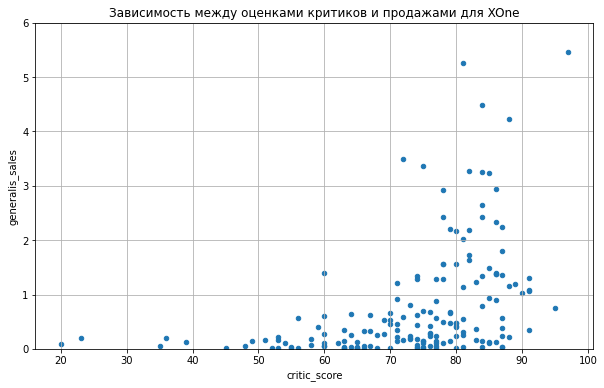

In [67]:
data_13_16[data_13_16['platform'] == 'XOne']\
.plot(x='critic_score', y='generalis_sales', ylim=(0, 6), title='Зависимость между оценками критиков и продажами для XOne',\
      kind='scatter', figsize=(10,6), grid=True)

In [68]:
data_13_16[data_13_16['platform'] == 'XOne']['critic_score']\
.corr(data_13_16[data_13_16['platform'] == 'XOne']['generalis_sales'])

0.4169983280084017

Теперь построим диаграмму рассеяния и посчитаем корреляцию между **оценками пользователей** и продажами для XOne.

<AxesSubplot:title={'center':'Зависимость между оценками пользователей и продажами для XOne'}, xlabel='user_score', ylabel='generalis_sales'>

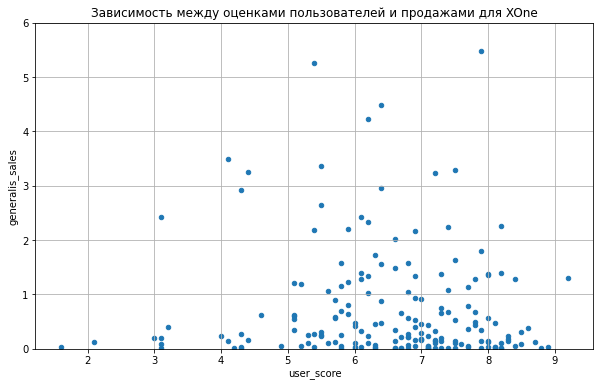

In [69]:
data_13_16[data_13_16['platform'] == 'XOne']\
.plot(x='user_score', y='generalis_sales', ylim=(0, 6), title='Зависимость между оценками пользователей и продажами для XOne',\
      kind='scatter', figsize=(10,6), grid=True)

In [70]:
data_13_16[data_13_16['platform'] == 'XOne']['user_score'].corr(data_13_16[data_13_16['platform'] == 'XOne']['generalis_sales'])

-0.06892505328279414

#### Построим диаграмму рассеяния для платформы 3DS и посчитаем корреляцию между *оценками критиков* и продажами. 

<AxesSubplot:title={'center':'Зависимость между оценками критиков и продажами для 3DS'}, xlabel='critic_score', ylabel='generalis_sales'>

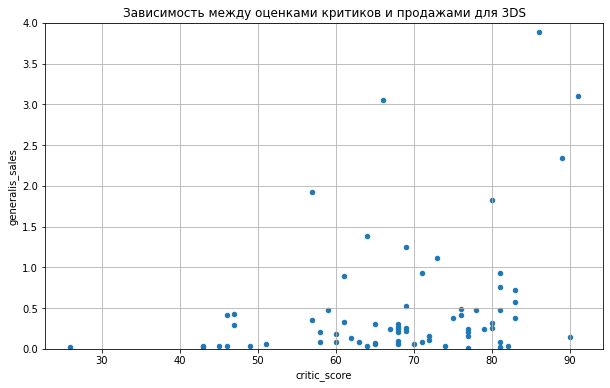

In [71]:
data_13_16[data_13_16['platform'] == '3DS']\
.plot(x='critic_score', y='generalis_sales', ylim=(0, 4), title='Зависимость между оценками критиков и продажами для 3DS',\
      kind='scatter', figsize=(10,6), grid=True)

In [72]:
data_13_16[data_13_16['platform'] == '3DS']['critic_score'].corr(data_13_16[data_13_16['platform'] == '3DS']['generalis_sales'])

0.3570566142288103

Теперь построим диаграмму рассеяния и посчитаем корреляцию между **оценками пользователей** и продажами для 3DS.

<AxesSubplot:title={'center':'Зависимость между оценками пользователей и продажами для 3DS'}, xlabel='user_score', ylabel='generalis_sales'>

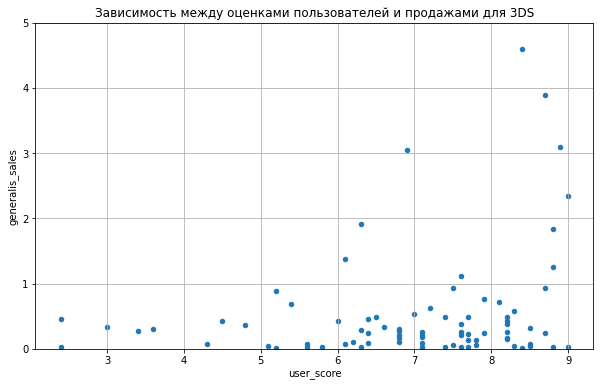

In [73]:
data_13_16[data_13_16['platform'] == '3DS']\
.plot(x='user_score', y='generalis_sales', ylim=(0, 5), title='Зависимость между оценками пользователей и продажами для 3DS',\
      kind='scatter', figsize=(10,6), grid=True)

In [74]:
data_13_16[data_13_16['platform'] == '3DS']['user_score'].corr(data_13_16[data_13_16['platform'] == '3DS']['generalis_sales'])

0.24150411773563016

**ВЫВОД: можно сказать, что высокие оценки критиков более совпадают с популярностью платформ, тогда как пользователи руководствуются личным мнением, чаще не совпадающим с популярностью платформ.**

### Посмотрим на общее распределение игр по жанрам.

<AxesSubplot:title={'center':'Продажи игр в разрезе по жанрам'}, xlabel='genre'>

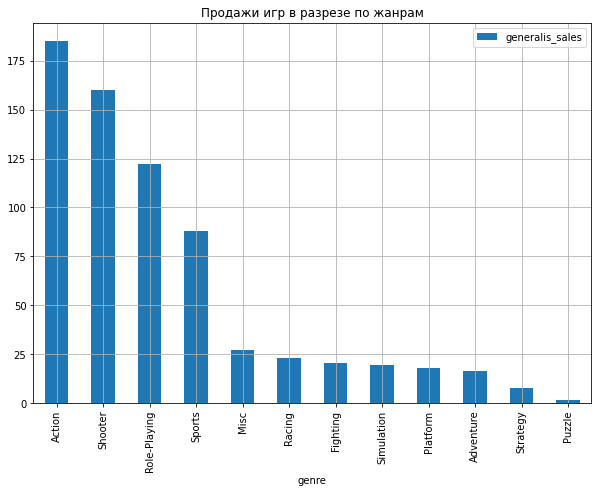

In [75]:
data_13_16.pivot_table(index='genre', values='generalis_sales', aggfunc='sum')\
.sort_values(by='generalis_sales', ascending=False)\
.plot(kind='bar', figsize=(10, 7), title='Продажи игр в разрезе по жанрам', grid=True)

**Больше всего продано игр жанров Action, Shooter, Role-Playing и Sports.**

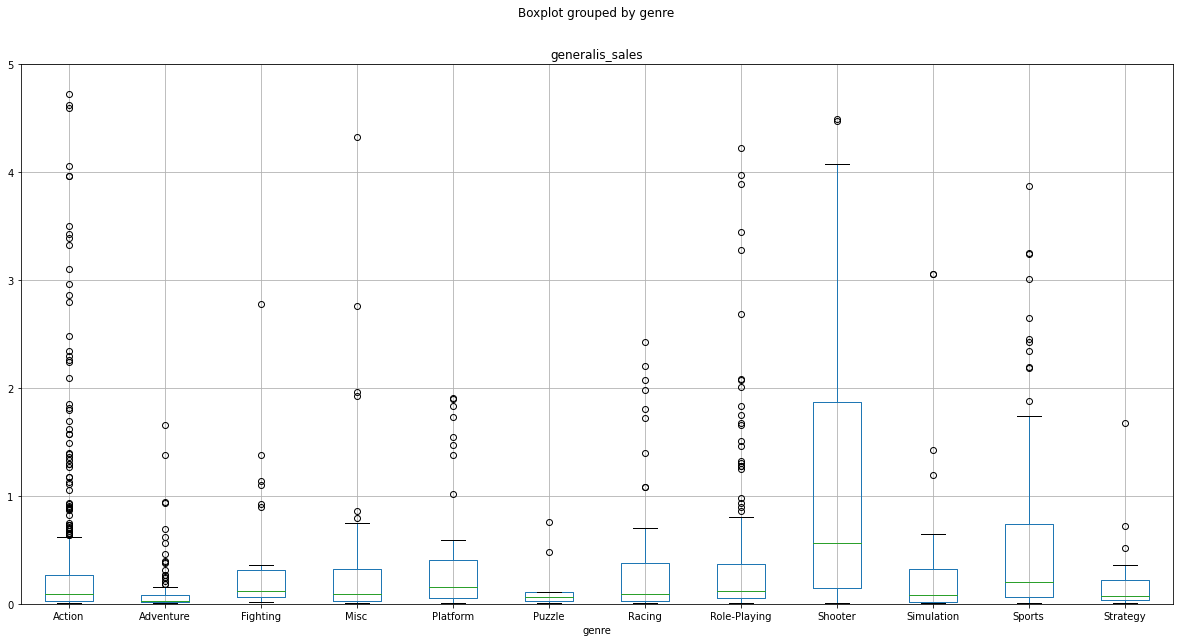

In [76]:
# Посмотрим на диаграммы размаха по жанрам
data_13_16.boxplot(column='generalis_sales', by='genre', grid= True, figsize=(20, 10))
plt.ylim(0, 5)
plt.show()

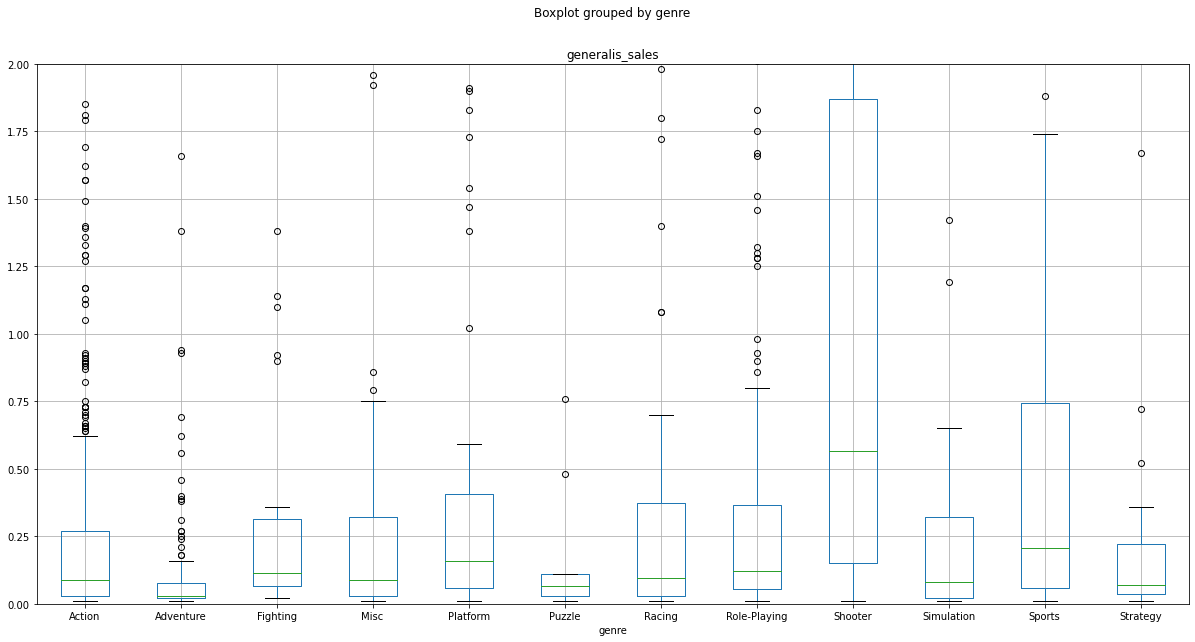

In [77]:
# Посмотрим на диаграммы размаха по жанрам без сильных выбросов
data_13_16.boxplot(column='generalis_sales', by='genre', grid= True, figsize=(20, 10))
plt.ylim(0, 2)
plt.show()

In [78]:
data_13_16.pivot_table(index='genre', values='generalis_sales', aggfunc=['mean', 'median', 'count'])

,mean,median,count
,generalis_sales,generalis_sales,generalis_sales
genre,,,
Action,0.353843,0.090,523
Adventure,0.098253,0.030,166
Fighting,0.468182,0.115,44
Misc,0.290213,0.090,94
Platform,0.448750,0.160,40
Puzzle,0.150833,0.065,12
Racing,0.396552,0.095,58
Role-Playing,0.547130,0.120,223


**Согласно выбросов на диаграмме размаха самые популярные игры тех же жанров - Shooter, Action и Role-Playing и Sports, но есть ещё одна очень популярная игра жанра Simulation. При этом медианное значение по количеству проданных копий у жанра Action одно из самых низких, а жанр Platform напротив занимает третье место, это означает, что большая часть игр жанра Action не лидер на рынке продаж.**

## Составим портрет пользователя каждого региона

### Посмотрим на продажи по регионам: Северная Америка, Европа и Япония

<AxesSubplot:title={'center':'Продажи игр в разрезе платформ по регионам'}, xlabel='platform'>

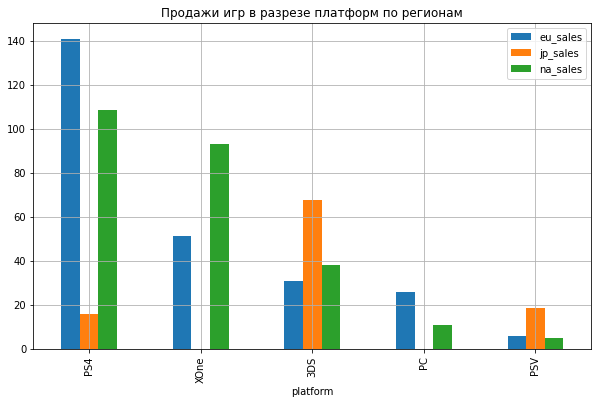

In [79]:
# Построим гистограммы для всех трех регионов в разрезе по платформам
data_13_16.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)\
.plot(kind='bar', grid=True, title='Продажи игр в разрезе платформ по регионам', figsize=(10, 6))

**Самые популярные платформыв Северной Америке и Европе совпадают - PS4, XOne и 3DS, тогда как в Японии XOne самая непопулярная, а на первых местах стоят 3DS и самая непопулярная в Америке и Европе платформа PSV**

**Посмотрим на доли продаж по платформам**

In [80]:
data_na_sales = data_13_16.groupby('platform').agg({'na_sales': ['sum']}) #сумма проданных копий в СевернойАмерике по платформам
data_eu_sales = data_13_16.groupby('platform').agg({'eu_sales': ['sum']}) # сумма проданных копий в Европе по платформам
data_jp_sales = data_13_16.groupby('platform').agg({'jp_sales': ['sum']}) # сумма проданных копий в Японии по платформам

In [81]:
# Посмотрим на доли продаж по платформам в Северной Америке
data_na_sales['ratio'] = data_na_sales['na_sales']['sum'] / data_na_sales['na_sales']['sum'].sum()
data_na_sales.sort_values(by='ratio', ascending=False)

,na_sales,ratio
,sum,
platform,,
PS4,108.74,0.424285
XOne,93.12,0.363338
3DS,38.20,0.149050
PC,11.19,0.043661
PSV,5.04,0.019665


In [82]:
# Посмотрим на доли продаж по платформам в Европе
data_eu_sales['ratio'] = data_eu_sales['eu_sales']['sum'] / data_eu_sales['eu_sales']['sum'].sum()
data_eu_sales.sort_values(by='ratio', ascending=False)

,eu_sales,ratio
,sum,
platform,,
PS4,141.09,0.552039
XOne,51.59,0.201855
3DS,30.96,0.121136
PC,25.84,0.101103
PSV,6.10,0.023867


In [83]:
# Посмотрим на доли продаж по платформам в Японии
data_jp_sales['ratio'] = data_jp_sales['jp_sales']['sum'] / data_jp_sales['jp_sales']['sum'].sum()
data_jp_sales.sort_values(by='ratio', ascending=False)

,jp_sales,ratio
,sum,
platform,,
3DS,67.81,0.660273
PSV,18.59,0.181013
PS4,15.96,0.155404
XOne,0.34,0.003311
PC,0.00,0.000000


**В Японии на платформу 3DS приходится две третих от всех продаж, а остальная часть практически полностью приходится на две платформы - PSV и PS4. В Европе и Северной Америке на самую популярную в Японии платформу 3DS приходится всего лишь 12% и 15% соответственно, а самая популярная в этих регионах платформа - PS4, на её долю приходится большая половина продаж в Европе, и чуть меньше половины (42%) в Северной Америке. На второй позиции в Европе и Северной Америке находится XOne, это треть в Северной Америке (36%) и пятая часть в Европе (20%).**

### Посмотрим на самые популярные жанры по регионам

<AxesSubplot:title={'center':'Продажи игр в разрезе жанров по регионам'}, xlabel='genre'>

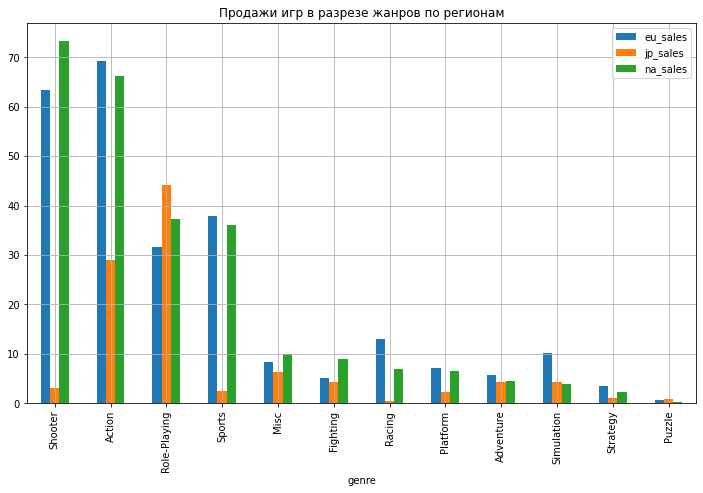

In [84]:
# Построим гистограммы для всех трех регионов в разрезе по платформам
data_13_16.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)\
.plot(kind='bar', grid=True, title='Продажи игр в разрезе жанров по регионам', figsize=(12, 7))

**В Европе и Северной Америке самые популярные игры жанров Shooter, Action, Role-Playing и Sports, при этом самый популярный в Северной Америке жанр Shooter, а самый популярный в Европе - жанр Action. В Японии же напротив жанры Shooter и Sports совсем не популярны, там первые позиции принадлежат играм жанра Role-Playing и Action.**

### Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе

<AxesSubplot:title={'center':'Продажи игр в разрезе рейтингов ESRB по регионам'}, xlabel='rating'>

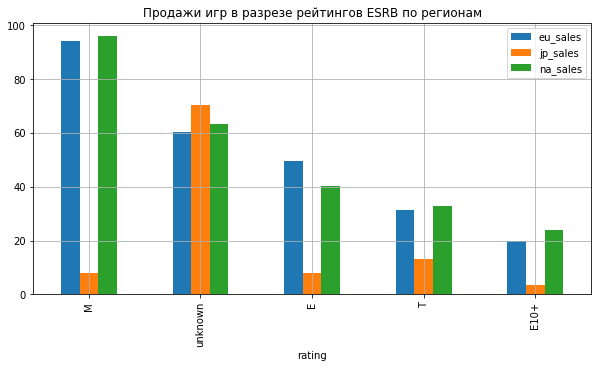

In [85]:
# Построим гистограммы для всех трех регионов в разрезе по рейтингам
data_13_16.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)\
.plot(kind='bar', grid=True, title='Продажи игр в разрезе рейтингов ESRB по регионам', figsize=(10, 5))

**В Европе и Северной Америке самые популярные игры рейтинга М - это игры для лиц старше 17 лет, когда насилие становится реалистичным и похожим на реальную жизнь, при этом в Японии такие игры совсем непопулярны, там больше игр вообще без рейтинга (возможно эти игры созданы в самой Японии), а вторую позицию занимают игры рейтинга Т - это игры для лиц старше 13 лет, когда игра может содержать более реалистичные и натуралистические сцены насилия .**

## Проверем гипотезы

### ГИПОТЕЗА - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [86]:
from scipy import stats as st

**Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

**Альтернативая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные**

**Вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна, примем alpha = 5%**

In [87]:
# сохраним выборку по платформе XOne с оценками пользователей без пропусков
user_score_XOne = data_13_16.loc[data_13_16['platform'] == 'XOne', 'user_score'].dropna()
# сохраним выборку по платформе PC с оценками пользователей без пропусков
user_score_PC = data_13_16.loc[data_13_16['platform'] == 'PC', 'user_score'].dropna()

In [88]:
# проверим размер общий размер выборок, если объем выборок небольшой, 
# то можно вполне отвергнуть нулевую гипотезу при уровне значимости 0,05
len(user_score_XOne) | len(user_score_PC)

190

In [89]:
alpha = 0.05

In [90]:
results = st.ttest_ind(user_score_XOne, user_score_PC)

In [91]:
print('p-значение:', results.pvalue)

p-значение: 0.15503167687396294


In [92]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


**Вывод: нулевая гипотеза верна, хотя условная вероятность p-value и мала, но она больше установленного критического значения, а значит в среднем пользовательские рейтинги платформ Xbox One и PC одинаковые**

### ГИПОТЕЗА - средние пользовательские рейтинги жанров Action и Sports разные.

**Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые**

**Альтернативая гипотеза - средние пользовательские рейтинги жанров Action и Sports разные**

**Вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна, примем alpha = 5%**

In [93]:
# сохраним выборку по жанру Action с оценками пользователей без пропусков
user_score_Action = data_13_16.loc[data_13_16['genre'] == 'Action', 'user_score'].dropna()
# сохраним выборку по жанру Sports с оценками пользователей без пропусков
user_score_Sports = data_13_16.loc[data_13_16['genre'] == 'Sports', 'user_score'].dropna()

In [94]:
# проверим общий размер выборок, если объем выборок небольшой,
# то можно вполне отвергнуть нулевую гипотезу при уровне значимости 0,05
len(user_score_Action) | len(user_score_Sports)

255

In [95]:
alpha = 0.05

In [96]:
results = st.ttest_ind(user_score_Action, user_score_Sports)

In [97]:
print('p-значение:', results.pvalue)

p-значение: 8.2939091693825e-14


In [98]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


**Вывод: нулевую гипотезу стоит отвергнуть, условная вероятность p-value слишком большая, а значит в среднем пользовательские рейтинги жанров Action и Sports разные**

**Так как при проверке гипотез мы берем две части генеральных совокупностей, независящие друг от друга (рейтинги разных платформ и рейтинги разных жанров), то  мы берем специальный метод (t-тест) для проверки гипотезы о равенстве среднего двух независимых генеральных совокупностей: scipy.stats.ttest_ind(array1, array2, equal_var).**

## ОБЩИЙ ВЫВОД: 

Была проведена предобработка и изучены данные о компьютерных играх с датой выпуска с 1980г. по 2016г., продаваемые в Северной Америке, Европе и Японии. В рамках предобработки были удалены строки с некорректными данными, пропуски в годах релиза игр были частично обработаны, частично удалены в незначительной массе, что никак не повлияло на исследования, изменен устаревший рейтинг на актуальный, в оценках пользователей заменены строковые значения.

В рамках исследовательского анализа было установлено, что с 2008г. по 2012г. количество выпускаемых игр падало, с 2013г. наоборот расло, также выяснили, что в среднем платформа существует 10-11лет, пик популярности приходится на середину срока существования платформы. В связи с этой информацией  были отброшены платформы, которые уже далеко прошли пик своей популярности к 2015-2016гг. В список перспективных платформ вошли платформы с неубывающим на 2015-2016гг. числом продаж: PC, PS4, XOne и 3DS, платформа PSV также была включена в актуальный список, т.к. занимала третью позицию по количеству игр среди всех платформ.

При дальнейшем анализе было выявлено, что из пяти платформ лидером продаж является PS4, у этой платформы много разнообразных игр в немалом количестве проданных копий, как и идущей следом за ней по популярности XOne. Самых популярных игр также больше у PS4, XOne и 3DS. Платформа PSV самая непопулярная платформа, хотя по количеству проданных копий занимает вторую позицию.

Самые популярные игры жанров - Shooter, Action и Role-Playing и Sports. При этом в общей массе по количеству проданных копий у жанра Action одна из самых низких позиций, а жанр Platform напротив занимает третье место.

Что касаемо оценок, установлено, что высокие оценки критиков более совпадают с популярностью платформ, тогда как пользователи руководствуются субъективным мнением и их оценки чаще носятт разрозненный характер.

При анализе установлены региональные различия, так в Японии на платформу 3DS приходится две третих от всех продаж, а остальная часть практически полностью приходится на две платформы - PSV и PS4. В Европе и Северной Америке самая популярная платформа - PS4, на её долю приходится большая половина продаж в Европе, и чуть меньше половины (42%) в Северной Америке. На второй позиции в Европе и Северной Америке находится XOne, это треть в Северной Америке (36%) и пятая часть в Европе (20%). В Европе и Северной Америке самые популярные игры жанров Shooter, Action, Role-Playing и Sports, при этом самый популярный в Северной Америке жанр Shooter, а самый популярный в Европе - жанр Action. В Японии же напротив жанры Shooter и Sports совсем не популярны, там первые позиции принадлежат играм жанра Role-Playing и Action.